# Task 1

Given a list of monthly company revenue (in euros) and a window size, write a function that calculates
the rolling max of the revenue for that window size.


Example:

Input:

revenue = [80000, 55000, 105000, 7000, 90000, 45000, 15000, 125000, 90000, 13000]

window size = 4

Output:
105000 105000 105000 90000 125000 125000 125000

Explanation:

1st window = [80000, 55000, 105000, 7000], Max = 105000

2nd window = [55000, 105000, 7000, 90000], Max = 105000

3rd window = [105000, 7000, 90000, 45000], Max = 105000

4th window = [7000, 90000, 45000, 15000], Max = 90000

5th window = [90000, 45000, 15000, 125000], Max = 125000

6th window = [45000, 15000, 125000, 90000], Max = 125000

7th window = [15000, 125000, 90000, 13000], Max = 125000

Expected Time Complexity: O(N) where N = len(revenue)

Expected Auxiliary Space: O(window size)

No packages are needed.

Constraints:

1 ≤ len(revenue) ≤ 10^7

1 ≤ window size ≤ N

0 ≤ revenue[i] ≤ 10^7


In [1]:
def rolling_max_of_window(revenue, window_size):
    queue = []
    qs = 0

    output = []
    for i in range(len(revenue)):
        # if items at the end of the queue are smaller or equal that a new one delete
        while len(queue) > qs and revenue[queue[-1]] <= revenue[i]:
            del queue[-1]

        # add the new item
        queue.append(i)

        if i >= window_size - 1:
            # revenue[queue[qs]] always the biggest number
            output.append(revenue[queue[qs]])
            print(revenue[queue[qs]], end=' ')
            # move start of queue to the right
            if i - queue[qs] >= window_size - 1:
                qs += 1

        # empty queue by windows size when enough (window_size) indexes are stored
        if qs > window_size:
            del queue[0:window_size]
            qs -= window_size
    # return or print?
    # return output

In [2]:
revenue = [80000, 55000, 105000, 7000, 90000, 45000, 15000, 125000, 90000, 13000]
rolling_max_of_window(revenue, 4)

105000 105000 105000 90000 125000 125000 125000 

# Task 2


## Task 2.1 Create two datasets


Create two dataframes, which will represent your dummy data. The dataframes have three columns:
price, rating and sell rate. These represent the features of different products, which you are analysing
in order to find a relationship between them.
1. price: The price can take integer values between 10 and 600 (euros) and only in increments of 5.
2. rating: The rating takes floating values up to two decimal places between 1 and 5 (stars).
3. sell rate: Binary variable; either ’low’ or ’high’.
* First dataframe: Sample 3000 datapoints from two Gaussian distributions. The Gaussian for the
price should have a mean of 250 and a standard deviation of 80. The Gaussian for rating should
have a mean of 3 and a standard deviation of 0.5. All datapoints in this dataframe should have
sell rate set to ’high’. Make sure the ratings and prices still follow the rules described above.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

size_npa1 = 3000

np.random.seed(1)
# create Gaus distribution 2*desired size to be sure that at least 3000 points are valid
gaus_price = np.random.normal(loc=250, scale=80, size=2 * size_npa1)
gaus_rating = np.random.normal(loc=3, scale=0.5, size=2 * size_npa1)

# plt.scatter(gaus_price,gaus_rating)
# plt.show()
#
# sns.histplot(gaus_price, kde=True)
# plt.show()
#
# sns.histplot(gaus_rating, kde=True)
# plt.show()

In [4]:
np_array1 = np.empty([size_npa1, 3])


def trim_np_to_limits_and_shuffle(np_array, lower, upper):
    np.random.shuffle(np_array)
    np_array = np.delete(np_array, np.where((np_array < lower)))
    np_array = np.delete(np_array, np.where((np_array > upper)))
    return np_array


gaus_price = trim_np_to_limits_and_shuffle(gaus_price, 10, 600)
np_array1[:, 0] = gaus_price[:3000]

gaus_rating = trim_np_to_limits_and_shuffle(gaus_rating, 1, 5)
np_array1[:, 1] = gaus_rating[:3000]
# label - high
np_array1[:, 2] = 1


* Second dataframe: Sample 10000 random values for both price and rating, with uniform probability within the ranges described above. Of these datapoint, only keep the ones that satisfy the following condition: price < 5e^rating. Set the sell rate for these datapoints to ’low’

In [5]:
size_npa2 = 10000
ranges = np.array([[10, 600], [1, 5], [0, 1]])
np_array2 = np.random.uniform(low=ranges[:, 0], high=ranges[:, 1], size=(size_npa2, ranges.shape[0]))
# label - low
np_array2[:, 2] = 0

## 2.2 Combine the datasets

In [6]:
np_combined_array = np.append(np_array1, np_array2, axis=0)

# price: integer values between 10 and 600 (euros) and only in increments of 5
np_combined_array[:, 0] = np.around(np_combined_array[:, 0] / 5, decimals=0) * 5
# rating: two decimal places
np_combined_array[:, 1] = np.round(np_combined_array[:, 1], 2)


In [7]:
# Remove (low labeled) datapoints that don't follow the condition: price < 5e^rating
np_combined_array = np.delete(np_combined_array, np.where(
    (np_combined_array[:, 0] >= 5 * np.exp(np_combined_array[:, 1])) & (np_combined_array[:, 2] == 0))[0], axis=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


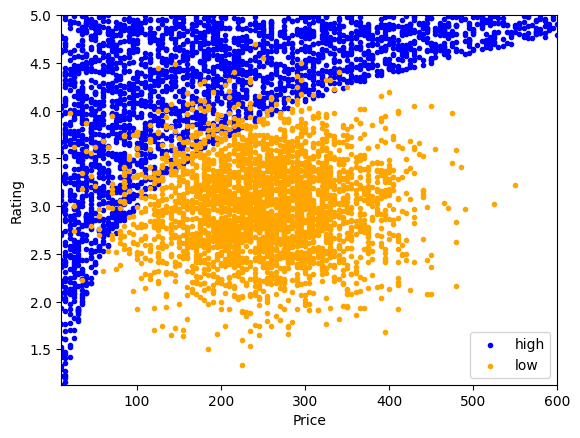

<Figure size 1600x1000 with 0 Axes>

In [8]:
from matplotlib.colors import ListedColormap

price, rating = np_combined_array[:, 0], np_combined_array[:, 1]
features = np_combined_array[:, :-1]
y_set = np_combined_array[:, -1]
plt.xlim(price.min(), price.max())
plt.ylim(rating.min(), rating.max())
for i, j in enumerate(np.unique(np_combined_array[:, 2])):
    plt.scatter(features[y_set == j, 0], features[y_set == j, 1], c=ListedColormap(('blue', 'orange'))(i),
                label="low" if j == 1 else "high", marker=".")
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend()
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)
plt.show()

## 2.3 Predict the data

In [9]:
dataset = pd.DataFrame(np_combined_array)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[-0.41556642 -1.59512449]
 [ 0.74351159 -1.3590414 ]
 [-0.24998385 -0.66259628]
 ...
 [ 0.61932466 -0.95770014]
 [-0.58114899 -1.02852507]
 [-0.49835771 -0.60357551]]


In [13]:
from matplotlib.colors import ListedColormap


def scatterplot_results(x_test, y_test, title):
    plt.clf()
    X_set, y_set = sc.inverse_transform(x_test), y_test
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min(), stop=X_set[:, 0].max(), step=1),
                         np.arange(start=X_set[:, 1].min(), stop=X_set[:, 1].max(), step=1))
    plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('blue', 'orange')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('blue', 'orange'))(i),
                    label="low" if j == 1 else "high",
                    marker=".")
    plt.title(title + ' (Test set)')
    plt.xlabel('Price')
    plt.ylabel('Rating')
    plt.legend()
    plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score


def evaluate_classifier(classifier, title, X_train, y_train):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    scatterplot_results(X_test, y_test, title)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[678  21]
 [ 39 719]]
0.9588194921070693


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


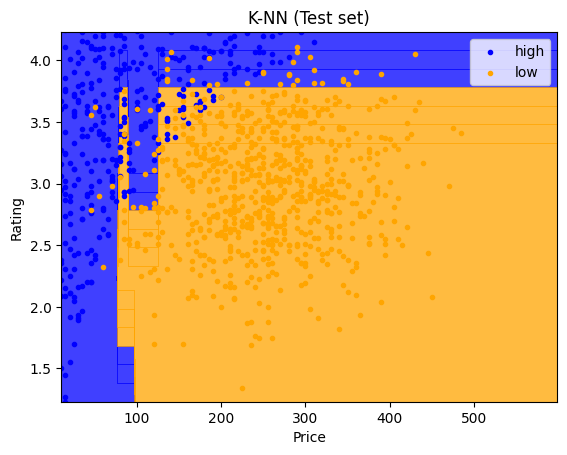

In [15]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
evaluate_classifier(classifier, "K-NN", X_train, y_train)
# 95% (n_neighbors = 5, metric = 'minkowski', p = 2)
# 95% (n_neighbors = 10, metric = 'minkowski', p = 2)
# 95% (n_neighbors = 100, metric = 'minkowski', p = 2)
# 95% (n_neighbors = 5, metric = 'minkowski', p = 20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[682  17]
 [ 36 722]]
0.9636238846945779


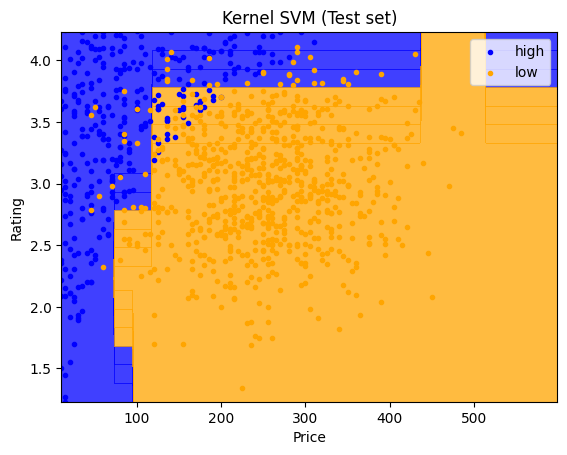

In [16]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=0)
evaluate_classifier(classifier, "Kernel SVM", X_train, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[674  25]
 [ 59 699]]
0.942347288949897


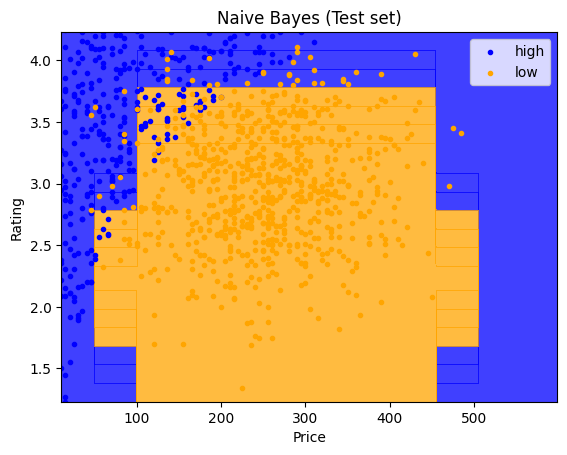

In [17]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
evaluate_classifier(classifier, "Naive Bayes", X_train, y_train)